In [1]:
# 地圖初始墻值設 1
# 可以走的路設 0
# 將走過路設 2
# 走過確認周圍無可走的路(死路)設 3


def maze_runner(maze, start, end):

    stk = [start]  # stack
    maze[start] = 2 # 標記起點走過了
    
    
    # 簡單提供一個點可以走的方向，按照: 下、左、右、上的順序
    def _direction(p):
        i, j = p 
        return (i+1, j), (i, j-1), (i, j+1), (i-1, j)
       
    
    # 開始地回找路
    while len(stk) > 0:
        
        if stk[-1] == end: # 若找到終點直接停止
            return True
        
        for p in _direction(stk[-1]):
            try:
                if maze[p] == 0:   # 如果為可走的點則加入stack，並標記走過
                    stk.append(p)
                    maze[p] = 2
                    break
            except IndexError:
                pass
        else:
            maze[stk[-1]] = 3  # 若周圍圍可走的點標記該點為死點
            stk.pop() # 回溯上一步
    
    return False
        
        
        
    
    

In [2]:
import numpy as np



maze = np.ones(shape=(8, 10))
road = [[1, 1], [1, 4], [1, 5], [1, 6], [1, 8],
        [2, 1], [2, 4], [2, 6], [2, 8],
        [3, 1], [3, 3], [3, 4], [3, 7], [3, 8],
        [4, 1], [4, 3], [4, 5], [4, 8],
        [5, 1], [5, 2], [5, 3], [5, 5], [5, 6], [5, 7], [5, 8],
        [6, 1], [6, 3], [6, 4], [6, 5], [6, 8],
        [7, 1], [7, 5], [7, 8]]

for pos in road:
    i, j = pos
    maze[i, j] = 0
maze

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 1., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 1., 0., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 1., 1., 0., 1.],
       [1., 0., 1., 1., 1., 0., 1., 1., 0., 1.]])

In [3]:
maze_runner(maze, (1, 1), (1, 8))
maze

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 2., 1., 1., 0., 0., 0., 1., 2., 1.],
       [1., 2., 1., 1., 0., 1., 0., 1., 2., 1.],
       [1., 2., 1., 0., 0., 1., 1., 3., 2., 1.],
       [1., 2., 1., 0., 1., 0., 1., 1., 2., 1.],
       [1., 2., 2., 2., 1., 2., 2., 2., 2., 1.],
       [1., 3., 1., 2., 2., 2., 1., 1., 3., 1.],
       [1., 3., 1., 1., 1., 3., 1., 1., 3., 1.]])

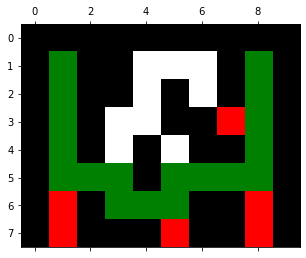

In [4]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

colors = ListedColormap(['w', 'k', 'green', 'red'])
plt.matshow(maze, cmap=colors)
plt.show()

